In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [4]:
df=pd.read_csv("A:\Dataset\Housing.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\astik\AppData\Local\Temp\ipykernel_14280\3250505371.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("A:\Dataset\Housing.csv")


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.drop(['mainroad','guestroom','basement','airconditioning','prefarea','furnishingstatus','hotwaterheating'],axis=1,inplace=True)

In [8]:
df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [10]:
df.isna().sum()

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


In [14]:
X=df.drop(['price'],axis=1)
y=df['price']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [18]:
Ridge_model=Ridge(alpha=1).fit(X_train,y_train)
Ridge_model.intercept_

-294136.71880243905

In [20]:
X=df.drop(['area'],axis=1)
y=df['area']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
Ridge_model=Ridge(alpha=1).fit(X_train,y_train)
Ridge_model.intercept_

3288.514350207669

In [26]:
y_pred=Ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

2100.671844140512

In [28]:
Ridge_model.coef_

array([ 5.83601906e-04, -9.58064661e+01, -5.65549276e+02, -1.66259922e+02,
        4.21581961e+02])

In [30]:
r2_score(y_test,y_pred)

0.32272369015605773

In [32]:
from sklearn.model_selection import GridSearchCV
cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=6)
grid=dict()
grid['alpha']=np.arange(0,1,0.1)
model=Ridge()
search=GridSearchCV(model,grid,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
results=search.fit(X_train,y_train)
print('MAE:%.3f'%results.best_score_)
print('Config:%s'%results.best_params_)

MAE:-1228.637
Config:{'alpha': 0.9}


In [34]:
Ridge_model=Ridge(alpha=0.7).fit(X_train,y_train)
y_pred=Ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

2100.827599915048

In [36]:
r2_score(y_test,y_pred)

0.32262325218683174

In [38]:
pd.Series(Ridge_model.coef_,index=X_train.columns)

price          0.000584
bedrooms     -95.630620
bathrooms   -568.133822
stories     -166.221254
parking      422.125562
dtype: float64

<Axes: xlabel='price', ylabel='area'>

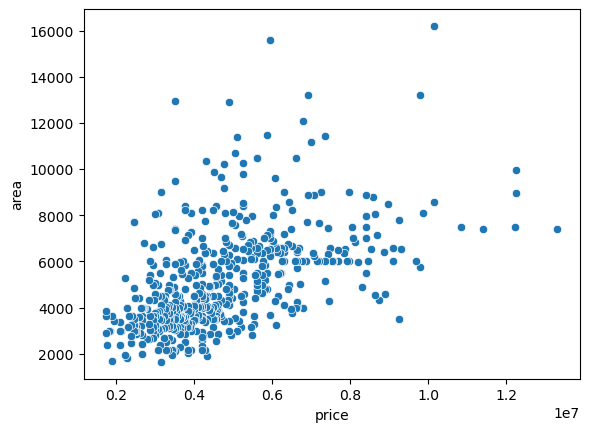

In [40]:
sns.scatterplot(x='price',y='area',data=df)

As the price increases with area the valuation of buying house is decreased and the price decreases with area the valuation of buying house is increased.

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

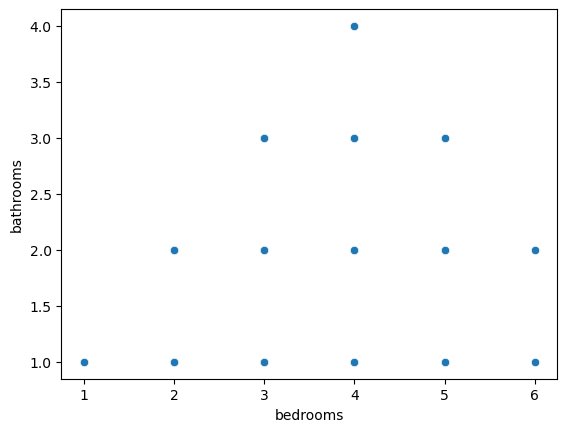

In [44]:
sns.scatterplot(x='bedrooms',y='bathrooms',data=df)

The bedrooms values increases with bathrooms values,it shows that bathrooms values are lesser than bedrooms value.

<Axes: xlabel='stories', ylabel='parking'>

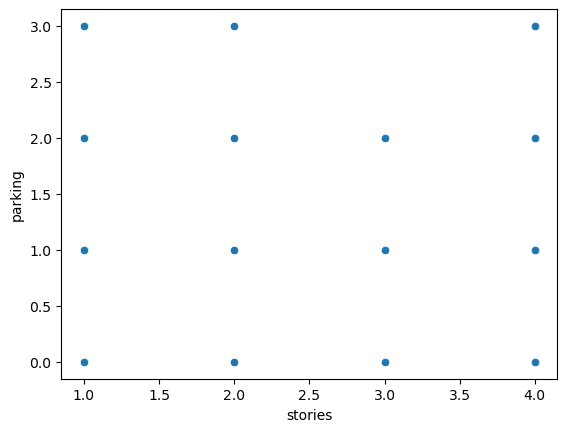

In [46]:
sns.scatterplot(x='stories',y='parking',data=df)

As per the stories and parking,the stories value increases the parking value increases lesser than the stories value.